In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import utils  

In [2]:
DATA_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = utils.load_and_clean_data(DATA_URL)
X_train, X_val, X_test, y_train, y_val, y_test = utils.get_processed_data(df)
print("\nData has been loaded and split successfully.")


Data has been loaded and split successfully.


In [3]:
print("\n--- Training a Baseline Model with default parameters ---")
input_dim = X_train.shape[1]
baseline_model = utils.IncomeClassifier(input_dim)


--- Training a Baseline Model with default parameters ---


In [4]:
baseline_history = utils.train_model_with_history(
    model=baseline_model,
    X_train=X_train, y_train=y_train,
    X_val=X_val, y_val=y_val,
    lr=0.0001,
    batch_size=64,
    epochs=20
)

Epoch 1/20 | Train Loss: 0.6103, Train Acc: 0.7223 | Val Loss: 0.4803, Val Acc: 0.7591
Epoch 2/20 | Train Loss: 0.4157, Train Acc: 0.7937 | Val Loss: 0.3657, Val Acc: 0.8319
Epoch 3/20 | Train Loss: 0.3582, Train Acc: 0.8360 | Val Loss: 0.3408, Val Acc: 0.8434
Epoch 4/20 | Train Loss: 0.3408, Train Acc: 0.8435 | Val Loss: 0.3335, Val Acc: 0.8428
Epoch 5/20 | Train Loss: 0.3349, Train Acc: 0.8458 | Val Loss: 0.3301, Val Acc: 0.8436
Epoch 6/20 | Train Loss: 0.3329, Train Acc: 0.8454 | Val Loss: 0.3280, Val Acc: 0.8478
Epoch 7/20 | Train Loss: 0.3286, Train Acc: 0.8487 | Val Loss: 0.3264, Val Acc: 0.8476
Epoch 8/20 | Train Loss: 0.3249, Train Acc: 0.8493 | Val Loss: 0.3252, Val Acc: 0.8478
Epoch 9/20 | Train Loss: 0.3223, Train Acc: 0.8511 | Val Loss: 0.3244, Val Acc: 0.8474
Epoch 10/20 | Train Loss: 0.3219, Train Acc: 0.8529 | Val Loss: 0.3235, Val Acc: 0.8493
Epoch 11/20 | Train Loss: 0.3199, Train Acc: 0.8528 | Val Loss: 0.3229, Val Acc: 0.8476
Epoch 12/20 | Train Loss: 0.3188, Train A


--- Plotting Baseline Model Training Curves ---


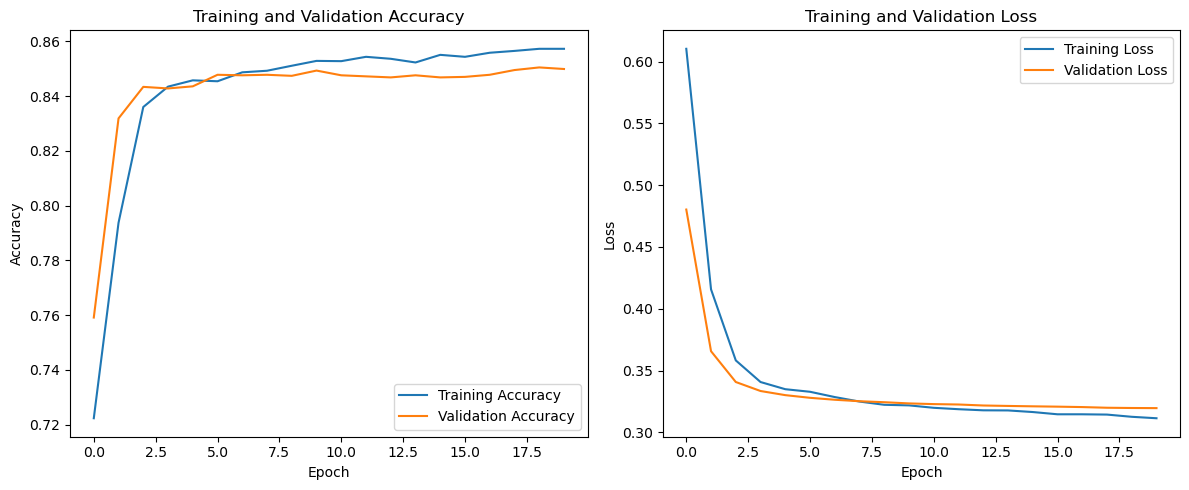

In [5]:
# Cell 4: Plot Baseline Training Curves
print("\n--- Plotting Baseline Model Training Curves ---")
utils.plot_training_curves(baseline_history)

In [6]:
# Cell 5: Run Hyperparameter Search
param_grid = {
    'lr': [0.01, 0.001],
    'batch_size': [64, 128],
    'dropout_rate': [0.2, 0.4]
}
results_df = utils.run_hyperparameter_search(param_grid, X_train, y_train, X_val, y_val)

Starting hyperparameter search... 🚀

--- Training with LR=0.01, Batch Size=64, Dropout=0.2 ---

--- Training with LR=0.01, Batch Size=64, Dropout=0.4 ---

--- Training with LR=0.01, Batch Size=128, Dropout=0.2 ---

--- Training with LR=0.01, Batch Size=128, Dropout=0.4 ---

--- Training with LR=0.001, Batch Size=64, Dropout=0.2 ---

--- Training with LR=0.001, Batch Size=64, Dropout=0.4 ---

--- Training with LR=0.001, Batch Size=128, Dropout=0.2 ---

--- Training with LR=0.001, Batch Size=128, Dropout=0.4 ---

Hyperparameter search finished in 167.62 seconds. ✨


In [7]:
print("\n--- Hyperparameter Search Analysis ---")
print("Search Results:")
display(results_df)


--- Hyperparameter Search Analysis ---
Search Results:


,lr,batch_size,dropout_rate,val_accuracy,val_f1_score
0,0.010,64,0.2,0.852015,0.665219
1,0.010,64,0.4,0.854511,0.645131
2,0.010,128,0.2,0.850288,0.661458
3,0.010,128,0.4,0.852975,0.671808
4,0.001,64,0.2,0.852975,0.665502
5,0.001,64,0.4,0.855278,0.667841
6,0.001,128,0.2,0.851248,0.675868
7,0.001,128,0.4,0.855470,0.682947


c:\College\7th Sem\Salary-Computation\utils.py:299: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=param_labels, y=results_df['val_accuracy'], palette='viridis')
c:\College\7th Sem\Salary-Computation\utils.py:307: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=param_labels, y=results_df['val_f1_score'], palette='plasma')


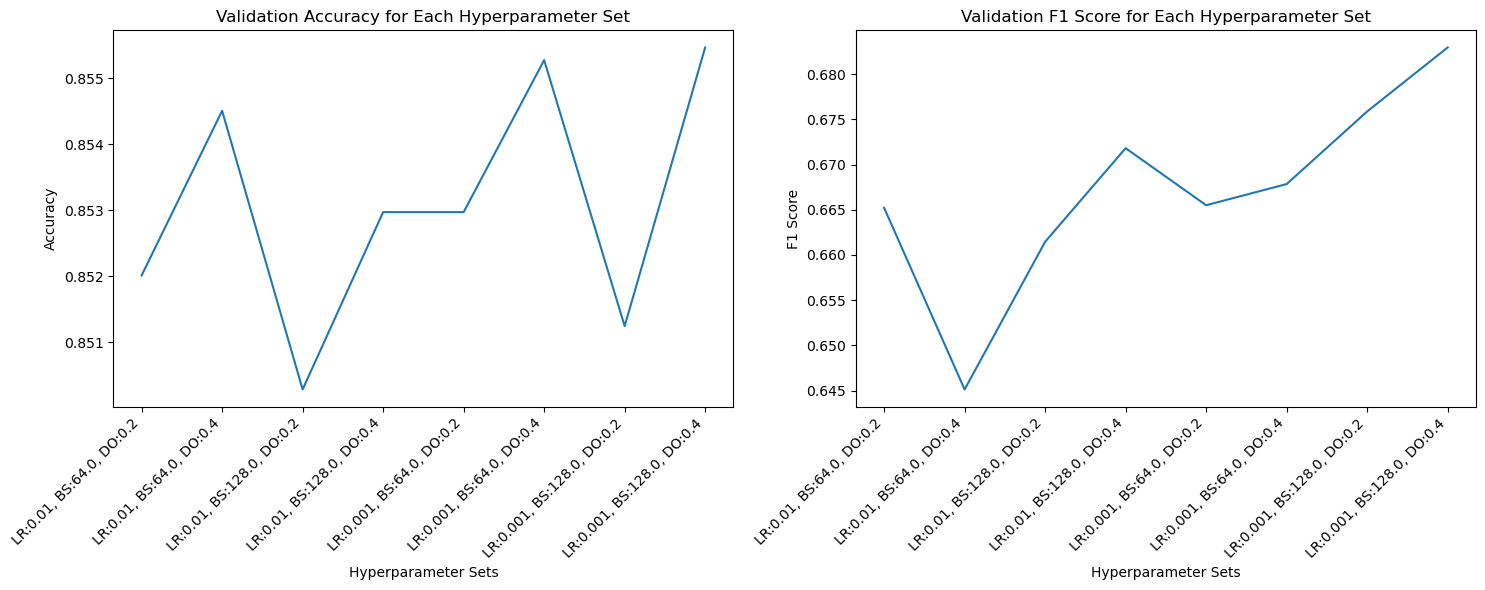

In [8]:
utils.plot_search_results(results_df)

In [9]:
best_params = results_df.loc[results_df['val_f1_score'].idxmax()]
print("\nBest Hyperparameters found:")
print(best_params)


Best Hyperparameters found:
lr                0.001000
batch_size      128.000000
dropout_rate      0.400000
val_accuracy      0.855470
val_f1_score      0.682947
Name: 7, dtype: float64


In [10]:
# Cell 7: Train the Final Model
print("\n--- Training the Final Model with Best Hyperparameters ---")
final_model, final_history = utils.train_final_model(
    best_params.to_dict(), X_train, y_train, X_val, y_val
)


--- Training the Final Model with Best Hyperparameters ---
Epoch 5/20, Loss: 0.3161, Accuracy: 0.8558
Epoch 10/20, Loss: 0.3099, Accuracy: 0.8600
Epoch 15/20, Loss: 0.3049, Accuracy: 0.8614
Epoch 20/20, Loss: 0.3012, Accuracy: 0.8649



--- Plotting Final Model Training Curves ---


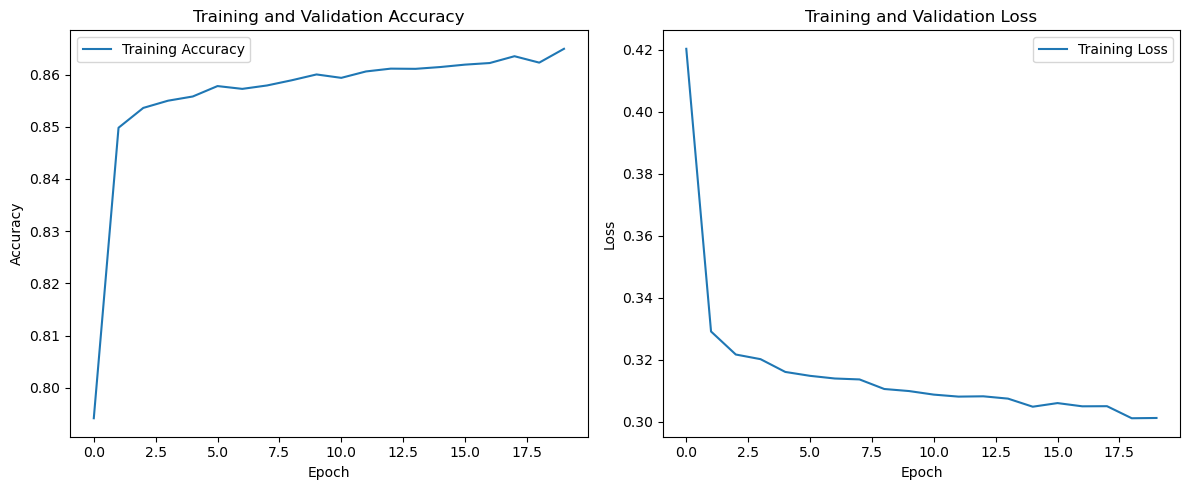

In [11]:
print("\n--- Plotting Final Model Training Curves ---")
utils.plot_training_curves(final_history)


--- Evaluating Final Model on Test Set ---

Final Model Performance on Test Set:
              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      4945
        >50K       0.76      0.62      0.68      1568

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.80      6513
weighted avg       0.86      0.86      0.86      6513



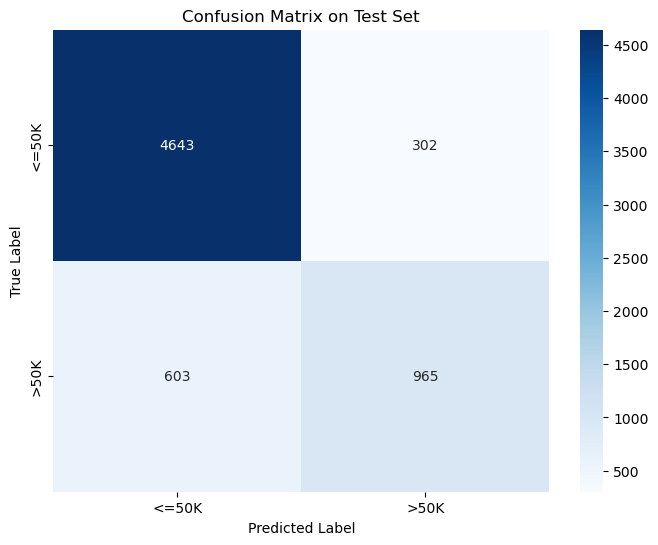

In [12]:
print("\n--- Evaluating Final Model on Test Set ---")
utils.evaluate_model(final_model, X_test, y_test)